In [1]:
import qutip
import numpy as np
import matplotlib.pyplot as plt 

In [22]:
X_pi = (-1j * np.pi/2 * qutip.sigmax()).expm()
Y_halfpi = (-1j * np.pi/4 * qutip.sigmay()).expm()

Hadamard = 1j * X_pi * Y_halfpi

In [26]:
def free_ev(t):
    return (1j * Delta/2 * t * qutip.sigmaz())

def propagators(A,w,ti,Delta):
    T = 2*np.pi/w; args = {}
    args['A'] = A; args['w'] = w; args['ti'] = ti
    H0 = -.5 * Delta * qutip.sigmaz()
    H1 = -.5 * qutip.sigmax()
    
    def H1_coefficient(t, args):
        A = args['A']; w = args['w']; ti = args['ti']
        if 0 <= t and t < ti:
            coeff = 0
        elif ti < t and t < ti + T:
            coeff = A * np.sin(w*t)
        else:
            coeff = 0
        return coeff
    
    H = [H0, [H1, H1_coefficient]]
    ts = np.linspace(1e-5, ti + T + ti + 3*np.pi/Delta, 50)
    Unumericals = qutip.propagator(H = H,
                                    t = ts,
                                    c_ops = None,
                                    args = args)
    Unum = Unumericals[-1]
    return Unum

def infidelity(Unum, target_gate):
    fid = (Unum.dag() * Unum).tr() + np.abs(((Unum * target_gate.dag()).tr()))**2
    return 1-fid/6

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mclr

Delta = .5
amplitude_grid = np.linspace(1e-2, 2, 100); a_list = list(amplitude_grid)
omega_grid = np.linspace(1e-2, 2, 100); w_list = list(omega_grid)
ti = 4.
X,Y = np.meshgrid(amplitude_grid, omega_grid, indexing='ij')
errors = [[-np.log(np.real(infidelity(propagators(A = A,
                        w = w,
                        ti = ti,
                        Delta = Delta), Hadamard))) for w in omega_grid] for A in amplitude_grid]

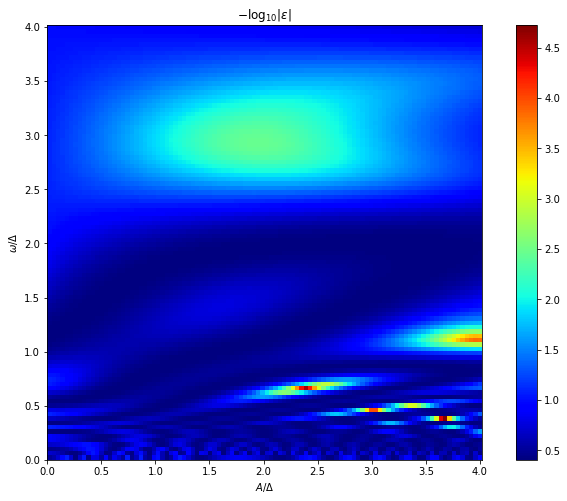

In [65]:
fig1, ax1 = plt.subplots(figsize=(12,8))
pc = ax1.pcolormesh(X/Delta, Y/Delta, errors, cmap="jet")
ax1.set_aspect('equal')
plt.title(r'$-\log_{10} |\varepsilon|$')
plt.ylabel(r'$\omega/\Delta$')
plt.xlabel(r'$A/\Delta$')
fig1.colorbar(pc)
plt.show()

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mclr

Delta = .5
amplitude_grid = np.linspace(1e-2, 2, 100); a_list = list(amplitude_grid)
omega_grid = np.linspace(1e-2, 2, 100); w_list = list(omega_grid)
ti = 0
X,Y = np.meshgrid(amplitude_grid, omega_grid, indexing='ij')
errors = [[-np.log(np.real(infidelity(propagators(A = A,
                        w = w,
                        ti = ti,
                        Delta = Delta), Hadamard))) for w in omega_grid] for A in amplitude_grid]

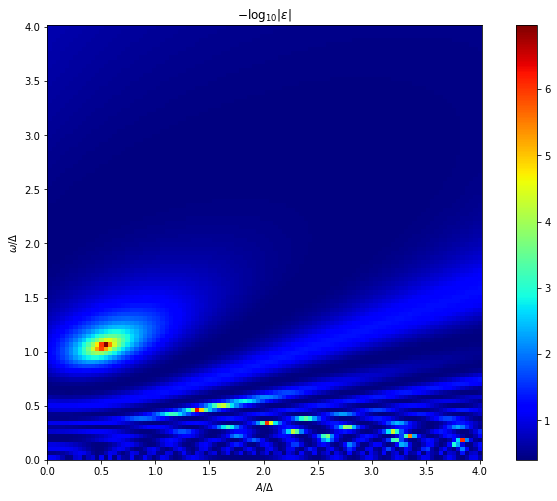

In [61]:
fig1, ax1 = plt.subplots(figsize=(12,8))
pc = ax1.pcolormesh(X/Delta, Y/Delta, errors, cmap="jet")
ax1.set_aspect('equal')
plt.title(r'$-\log_{10} |\varepsilon|$')
plt.ylabel(r'$\omega/\Delta$')
plt.xlabel(r'$A/\Delta$')
fig1.colorbar(pc)
plt.show()